# 딥러닝 모델 학습에 필요한 구성 요소

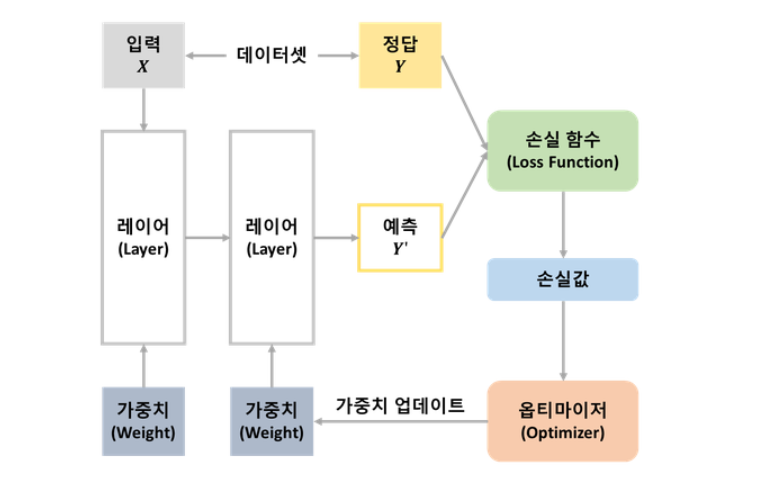

- 먼저 데이터셋을 입력 X와 실제 정답(레이블)인 Y로 구분합니다.
- 입력 데이터는 연속된 레이어로 구성된 네트워크(모델)를 통해 결과로 예측 Y′을 출력합니다.
- 손실 함수는 모델이 예측한 Y′과 실제 정답인 Y와 비교하여 얼마나 차이가 나는지 측정하는 손실 값을 계산합니다.
- 옵티마이저는 손실 값을 사용하여 모델의 가중치를 업데이트하는 과정을 수행합니다.
- 모델이 새롭게 예측한 Y′과 실제 정답인 Y의 차이를 측정하는 손실 값을 계산하는 과정을 반복합니다.
- 계산한 손실값을 최소화하도록 옵티마이저가 동작하는 것이 딥러닝 모델 학습입니다.


## 손실함수(Loss function)
- 학습이 진행되면서 해당 과정이 얼마나 잘 되고 있는지 나타내는 지표
- 모델이 훈련되는 동안 최소화될 값으로 주어진 문제에 대한 성공 지표
- 손실 함수에 따른 결과를 통해 파라미터를 조정하며 학습이 진행
- 손실함수는 최적화 이론에서 최소화하고자 하는 함수로 미분 가능 함수를 사용
- 케라스에서 제공되는 주요 손실함수
    - sparse_categorical_crossentropy
        - 클래스가 배타적인 방식으로 구분
        - (0,1,2,3, ... ,9)
    - categorical_cross_entropy
        - 클래스가 원핫 인코딩 방식으로 되어 있을 때 사용
    - binary_crossentropy
        - 이진 분류를 수행할 때 사용


- MAE
    - 오차가 커져도 소실함수가 일정하게 증가
    - 이상치에 강건한 특성
    - 회귀에 많이 사용하는 손실함수


- MSE
    - 오차가 커질수록 손실함수가 빠르게 증가하는 특성
    - 정답과 예측한 값의 차이가 클수록 더 많은 페널티를 부여하는 형태로 동작
    - 회귀에 사용되는 손실함수


- 원핫인코딩 
    - 범주형 변수를 표현할 때 사용
    - 가변수라고도 함
    - 정답인 레이블만 1이고 나머지는 0으로 처리하는 형태


- 교차 엔트로피 오차
    - 이진 분류 또는 다중 클래스 분류에 주로 사용
    - 오차는 소프트맥스 결과와 원핫인코딩 사이의 출력 간 거리르 비교
    - 정답을 맞추면 오차가 0, 틀리면 그 차이가클수록 오차가 무한히 커지게 됨


## 옵티마이저(optimizer)
- 손실함수를 기반으로 모델이 어떻게 업데이트되어야 하는지 결정
- 케라스에서 여러 옵티마이저를 제공하고, 사용자가 특정 종류의 확률적 경사 하강법 지정 가능
    - keras.optimizer.SGD() : 기본적인 확률적 경사 하강법
    - keras.optimizer.Adam() :  자주 사용되는 옵티마이저
- 보통 옵티마이저의 튜닝을 위해 따로 객체를 생성하여 컴파일시에 포함


- 경사하강법
    - 미분과 기울기로 동작하며, 스칼라를 벡터로 미분
    - 변화가 있는 지점에서는 미분값이 존재하고, 변화가 없는 지점은 미분값이 0이 되며, 미분값이 클수록 변화량이 큼
    - 경사하강법의 과정은 한 스텝마다의 미분값에 따라 이동하는 방향을 결정, f(x)의 값이 변하지 않을때까지 반복
    -  기울기가 0이지만 극값이 되지 않는 안장점(saddle point)가 존재
    - 경사하강법은 안장점에서 벗어나지 못하는 문제가 있음


- 학습률
    - 모델을 학습하기 위해서는 적절한 학습률을 지정해야 최저점에 잘 도달할 수 있음
    - 학습률이 너무 크면 발산하고, 너무 작으면 학습이 오래 걸리거나 최저점에 도달하지 못하는 문제가 있음


- 지표(maetrics)
    - 딥러닝 학습 시 필요한 다양한 지표들을 지정 가능
    - 일반적응로 mae 나 accuracy를 사용
    - accuracy같은 경우 줄여서 acc라고도 사용이 가능
    - keras에서 사용되는 지표 종류: http://keras.io/ko/metrics/


#### 데이터 생성
선형회귀(Linear Regression)를 위한 딥러닝 모델

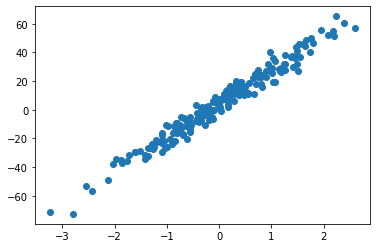

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# 데이터 생성
X, y = make_regression(n_samples=200, n_features=1, 
                       bias=5.0, noise=5.0, random_state=123)
y = np.expand_dims(y, axis=1)

plt.scatter(X, y)
plt.show()

In [2]:
# 데이터 셋 나누기 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    shuffle=True,
                                                    random_state=123)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(160, 1) (160, 1)
(40, 1) (40, 1)


#### 모델 생성

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, optimizers, utils

In [4]:
# 간단하게 모델 만들어주기
model = keras.Sequential()
model.add(layers.Dense(1, activation='linear', input_shape=(1,)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


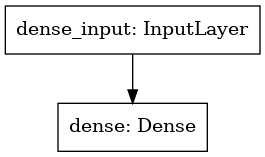

In [5]:
utils.plot_model(model) # 시각화

#### 모델 학습

- 옵티마이저(optimizer)로 SGD(Stochastic Gradient Descent) 를 사용
- 손실 함수로 mse를 지정하여 Mean Square Error를 사용
- 지표로는 mae와 mse를 사용

In [6]:
optimizer = optimizers.SGD()
model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
history = model.fit(x_train, y_train, epochs=40)

Epoch 1/40
5/5 [==============================] - 1s 2ms/step - loss: 625.4200 - mae: 20.0357 - mse: 625.4200
Epoch 2/40
5/5 [==============================] - 0s 2ms/step - loss: 501.2276 - mae: 17.9937 - mse: 501.2276
Epoch 3/40
5/5 [==============================] - 0s 2ms/step - loss: 404.0551 - mae: 16.1593 - mse: 404.0551
Epoch 4/40
5/5 [==============================] - 0s 1ms/step - loss: 326.2496 - mae: 14.5052 - mse: 326.2496
Epoch 5/40
5/5 [==============================] - 0s 2ms/step - loss: 263.9427 - mae: 13.0079 - mse: 263.9427
Epoch 6/40
5/5 [==============================] - 0s 1ms/step - loss: 214.4396 - mae: 11.7322 - mse: 214.4396
Epoch 7/40
5/5 [==============================] - 0s 2ms/step - loss: 175.0423 - mae: 10.6114 - mse: 175.0423
Epoch 8/40
5/5 [==============================] - 0s 1ms/step - loss: 143.6948 - mae: 9.6338 - mse: 143.6948
Epoch 9/40
5/5 [==============================] - 0s 2ms/step - loss: 118.6211 - mae: 8.7122 - mse: 118.6211
Epoch 10/40


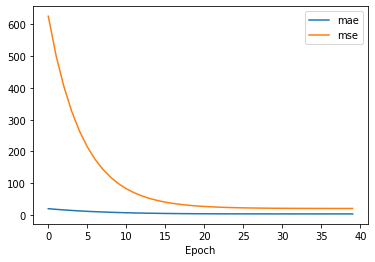

In [7]:
plt.plot(history.history['mae'])
plt.plot(history.history['mse'])
plt.xlabel('Epoch')
plt.legend(['mae', 'mse'])
plt.show();

#### 모델 평가

In [8]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 21.9263 - mae: 3.9884 - mse: 21.9263


[21.92630958557129, 3.988433837890625, 21.92630958557129]

#### 모델 예측

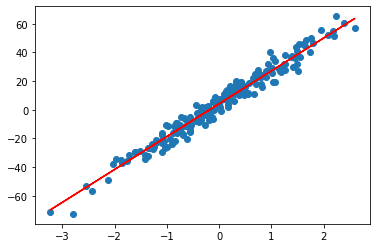

In [9]:
result = model.predict(X)

plt.scatter(X, y)
plt.plot(X, result, 'r')
plt.show()

In [10]:
# 레이어 확인
model.layers

In [11]:
layer = model.layers[0]
print(layer.name)
layer = model.get_layer('dense')
print(layer.name)

dense
dense


In [12]:
# 레이어에서 사용하는 가중치(weights)와 바이어스(biases)를 get_weights() 함수를 통해서 얻을 수 있음
weights, biases = layer.get_weights()
print(weights)
print(biases)

[[22.898409]]
[4.180042]


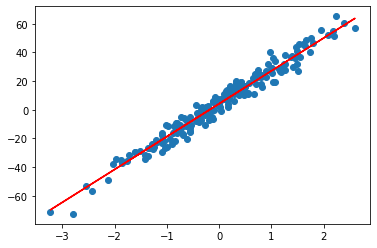

In [13]:
# 딥러닝 모델에서 학습된 가중치(weights)와 바이어스(biases)를 통해 선형회귀식을 np.array(weights * X + biases)로 표현
plt.scatter(X, y)
plt.plot(X, np.array(weights * X + biases), 'r')
plt.show()